In [1]:
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
with open('dataset.json', 'r') as f:
    dataset = json.load(f)
    
os.makedirs('images', exist_ok=True)

In [3]:
data = {
    'brand': {},
    'category': {},
    'gender' : {},
}

for item_id, item_data in dataset.items():
    for key, info in item_data['info'].items():
        if key == 'name':
            continue
        if info in data[key]:
            data[key][info] += 1
        else:
            data[key][info] = 1
            
for key, value in data.items():
    print('Total {}: {}'.format(key, len(value)))

Total brand: 647
Total category: 12
Total gender: 14


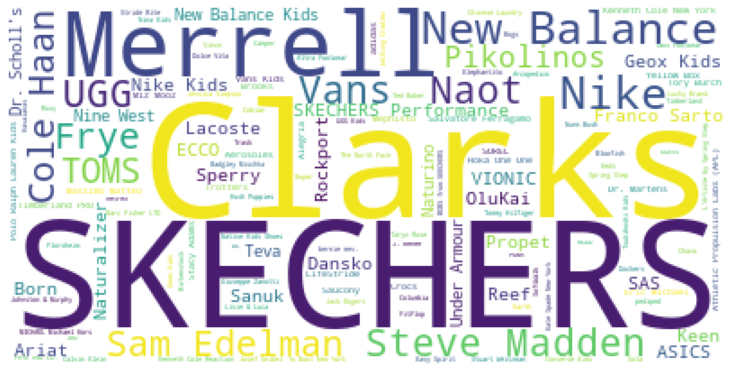

In [4]:
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=data['brand'])

plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

#plt.title('Brands')
plt.savefig(os.path.join('images', 'brands.png'))
plt.show() 

In [5]:
genders = {
    'general': 0,
    'men' : 0,
    'women': 0,
    'kids': 0,
    'boys': 0,
    'girls': 0,
}
for key, value in data['gender'].items():
    if key in genders:
        genders[key] = value
    else:
        if 'women' in key:
            genders['women'] += value
        elif 'men' in key:
            genders['men'] += value
        else:
            genders['general'] += value

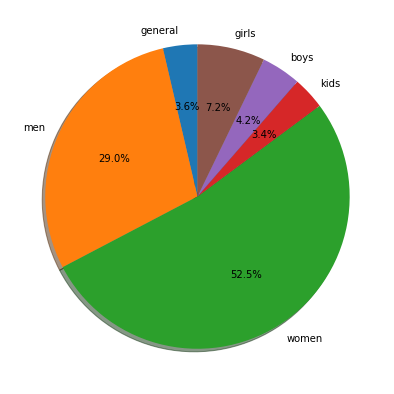

In [16]:
plt.figure(figsize=(7, 7))
plt.pie(list(genders.values()),
        labels=list(genders.keys()),
        shadow=True, startangle=90, autopct='%1.1f%%')
#plt.title('Genders')
plt.savefig(os.path.join('images', 'genders.png'), bbox_inches='tight')
plt.show()

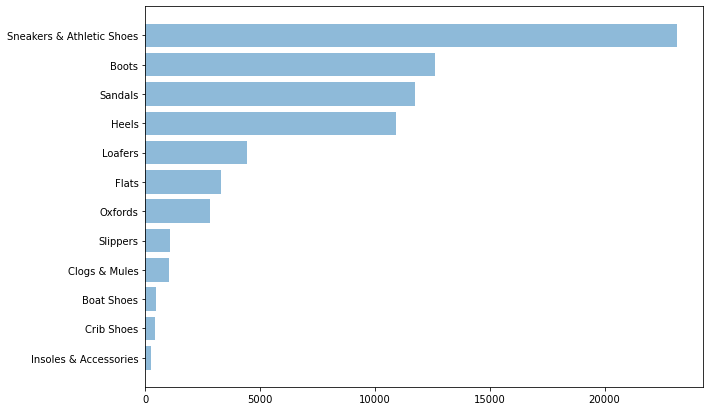

In [15]:
res = {k: v for k, v in sorted(data['category'].items(), key=lambda x : x[1])}

keys = list(res.keys())
values = list(res.values())

plt.figure(figsize=(10, 7))
plt.barh(range(len(res)), values,
        align='center', alpha=0.5)
plt.yticks(range(len(res)), keys)

#plt.title('Categories')
plt.savefig(os.path.join('images', 'categories.png'), bbox_inches='tight')
plt.show()

In [12]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, if *fname* is not a path or has no extension, remember to
        spe